## Introduction

Making informed decisions in retail is challenging due to limited historical data for rare but high-impact events such as holidays and major promotions, which occur only once a year. Additionally, pricing strategies such as markdowns can significantly influence customer behavior, yet their effects are often uneven across stores and departments.

This project independently explores these challenges by applying advanced machine learning techniques to historical retail data in order to:

- Predict department-level weekly sales across different stores

- Analyze the impact of markdowns during holiday periods

- Generate data-driven insights and recommendations focused on maximizing business impact

The project demonstrates how machine learning models can be used to understand complex retail dynamics and support strategic decision-making in real-world business scenarios.

## Materials and Methods


This project focuses on analyzing and forecasting retail store sales using time-series analysis and machine learning techniques. The analysis explores sales behavior at the department level and examines how historical trends, time dependencies, and promotional strategies influence weekly sales performance.

Autocorrelation analysis is applied to identify time-lag relationships in sales data, and the dataset is transformed accordingly to capture temporal dependencies. Multiple machine learning models are then implemented to predict department-level weekly sales over time.

In addition, the project investigates the impact of markdown strategies on sales performance during both holiday and non-holiday periods. Neural network–based models are used to analyze how promotional markdowns influence customer demand, followed by sensitivity analysis to quantify their effects. Based on the insights obtained, data-driven recommendations are proposed for optimizing sales strategies in specific departments.

This project demonstrates the application of advanced machine learning and time-series modeling techniques to support decision-making in a real-world retail environment.

## Prerequisites
To understand and run this project effectively, the following knowledge and tools are recommended:

- **Python** – Advanced (data processing, modeling, and analysis)
- **Pandas** – Basic to Intermediate (data manipulation and preprocessing)
- **Seaborn** – Basic (data visualization)
- **Scikit-learn** – Intermediate (machine learning models and evaluation)
- **Keras** – Intermediate (neural network implementation)

## Importing Required Libraries

In this section, we import all the necessary libraries for:
- Data manipulation
- Visualization
- Feature engineering
- Machine learning and deep learning (LSTM)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import LSTM

## Loading the Retail Dataset

The dataset is loaded directly from an online source.  
It contains store-level retail information along with additional features required for sales forecasting.


In [12]:
df1 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/Features%20data%20set.csv', delimiter=',')


In [13]:
df1.dataframeName = 'Features data set.csv'
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [14]:
df2 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/sales%20data-set.csv', delimiter=',')
df2.dataframeName = 'Sales data set.csv'
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [15]:
df3 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/stores%20data-set.csv', delimiter=',')
df3.dataframeName = 'Stores data set.csv'
df3

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [16]:
df = df1.merge(df3, on = 'Store')
df = df2.merge(df, on = ['Store','Date', 'IsHoliday'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [18]:
df=df.fillna(0)

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Type'] = df['Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  category      
 15  Size          421

**Since stores and their departments belong to different categories, have different sizes, different quantities and assortments of goods and are located in different parts of the city, it will be a mistake to fit the neural network on all records. Departments located in different parts of the city will have different sales with the same input data. In other words, the information for each department has its own variance. Therefore, for the analysis, it is necessary to identify departments and make an analysis for each of them individually.**


In [22]:
df.groupby(['Store', 'Dept','Date']).sum()

Store  Dept  Date      
1      1     2010-02-05    24924.50
             2010-02-12    46039.49
             2010-02-19    41595.55
             2010-02-26    19403.54
             2010-03-05    21827.90
                             ...   
45     98    2012-09-28      508.37
             2012-10-05      628.10
             2012-10-12     1061.02
             2012-10-19      760.01
             2012-10-26     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [23]:
df[['Store', 'Dept']].value_counts()

Store  Dept
45     97      143
1      1       143
45     74      143
       72      143
       71      143
              ... 
18     39        1
3      83        1
       78        1
4      39        1
34     78        1
Name: count, Length: 3331, dtype: int64

In [24]:
St = 24
Dt = 50

In [25]:
df_d = df[(df['Store']==St) & (df['Dept']==Dt)]
df_d

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
233063,24,50,2010-02-05,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
233064,24,50,2010-02-12,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
233065,24,50,2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
233066,24,50,2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
233067,24,50,2010-03-05,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233201,24,50,2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
233202,24,50,2012-10-05,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
233203,24,50,2012-10-12,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819
233204,24,50,2012-10-19,1151.0,False,52.59,4.153,3446.70,0.00,101.00,111.46,5963.01,138.833613,8.693,A,203819


## Predict the department-wise sales 

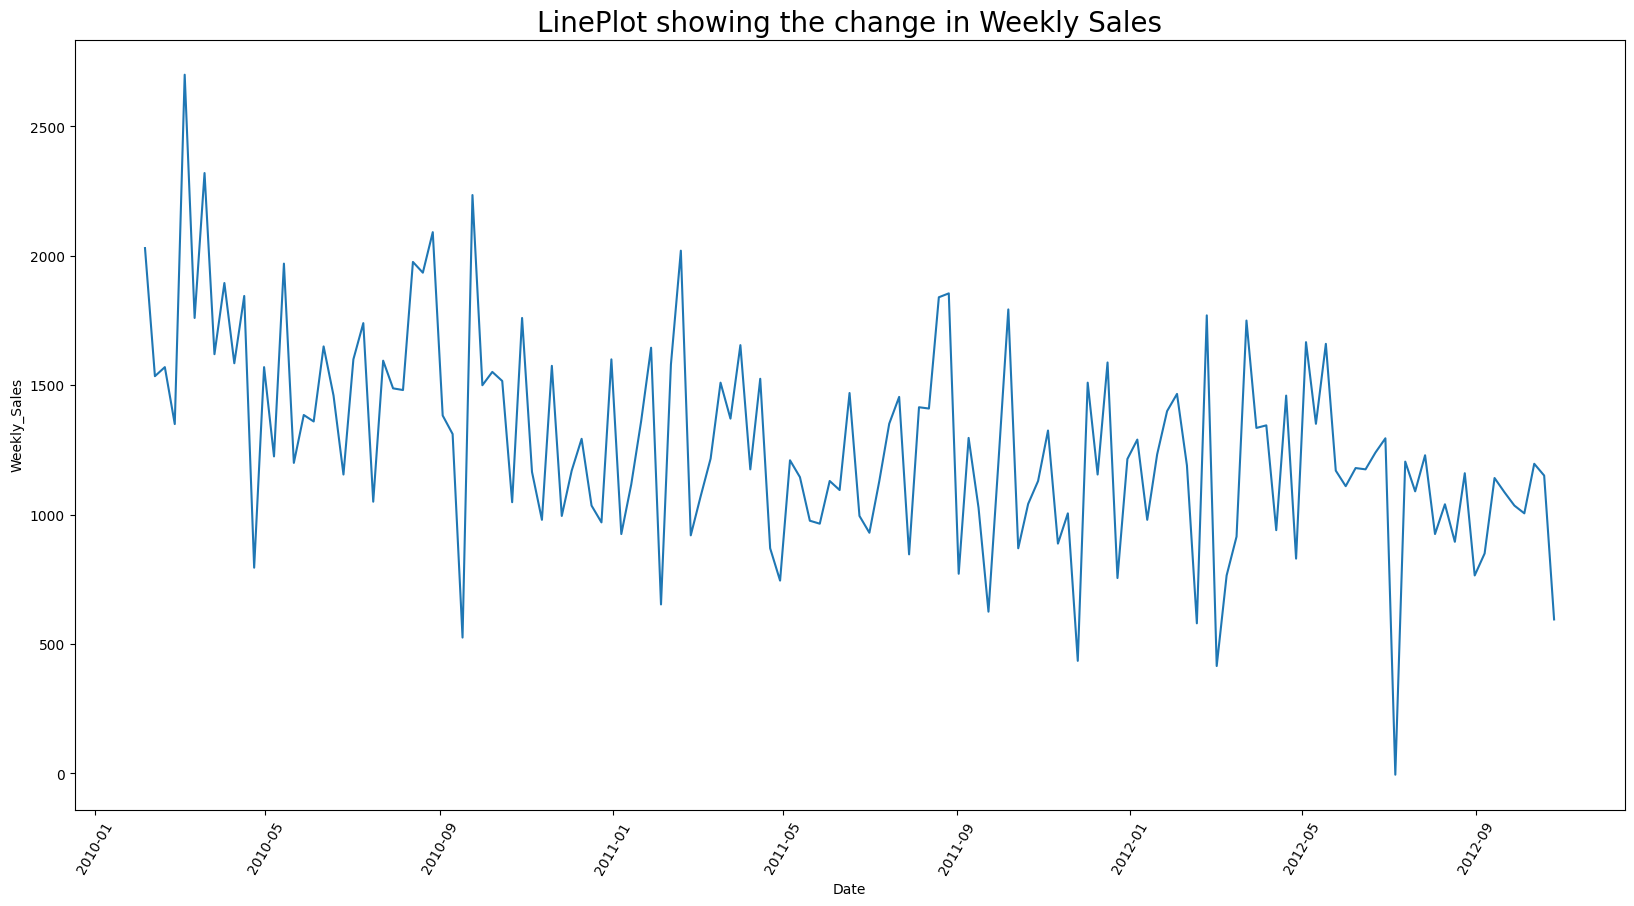

In [26]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', )
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

From the graph, we can observe that:
- Weekly sales **fluctuate significantly**, indicating high variability over time.
- There are **sharp peaks**, which may correspond to seasonal demand, promotions, or special events.
- There are also **sudden drops**, suggesting periods of lower sales or possible anomalies.
- Overall, the sales do not follow a smooth trend, highlighting the importance of time-series modeling to capture these variations.

C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1625035568.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  _ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1625035568.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  _ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)


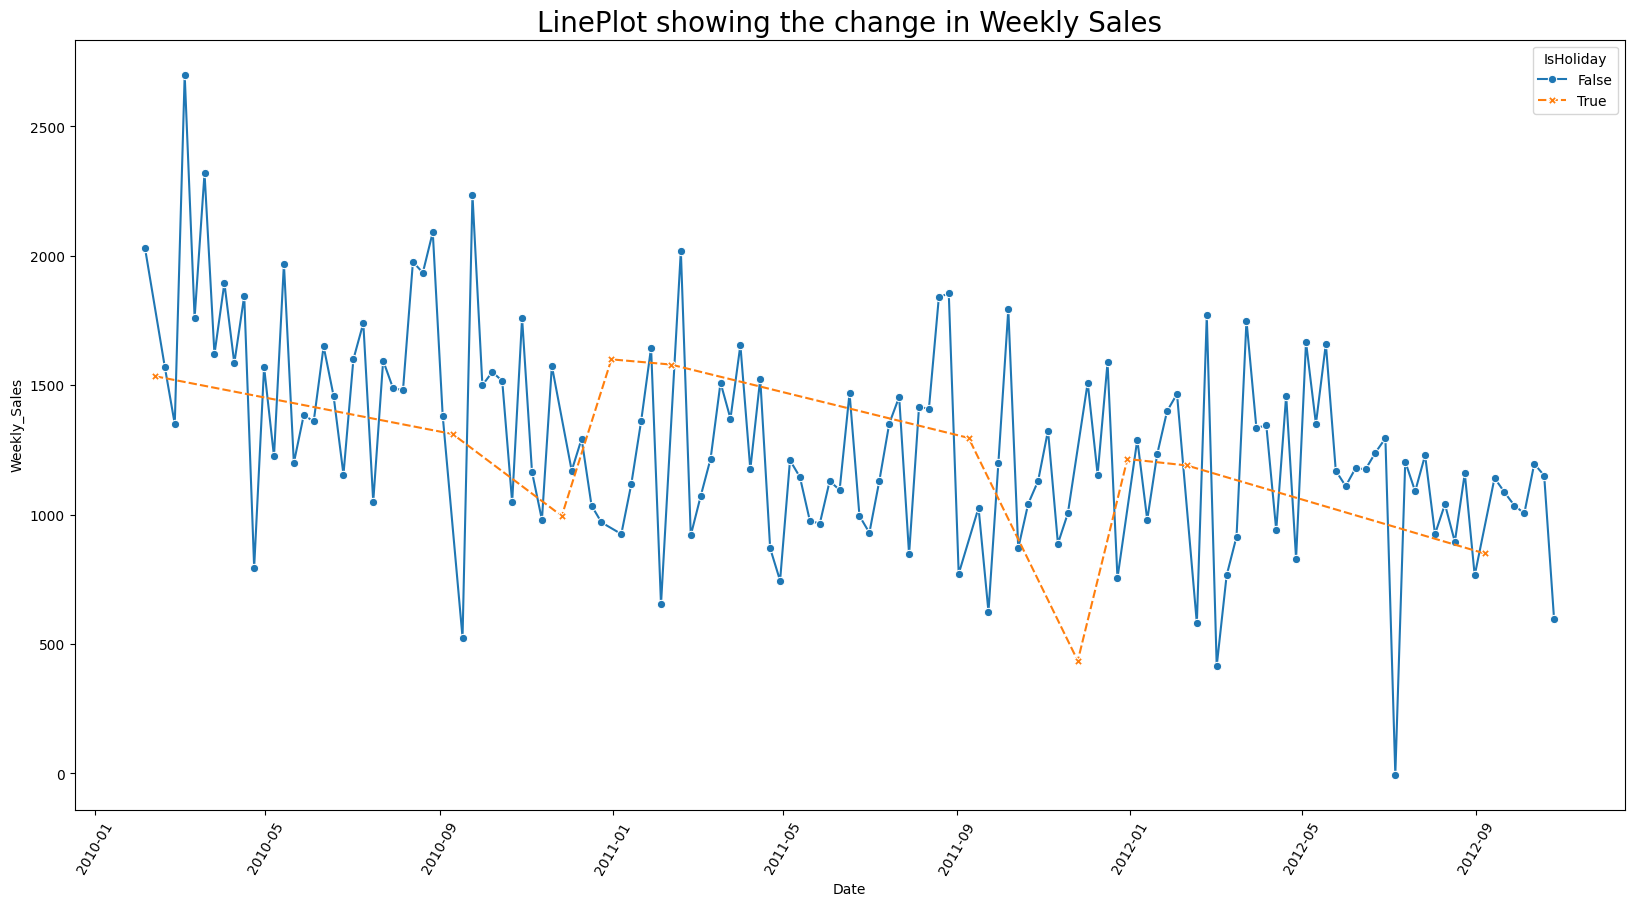

In [27]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

In [28]:
ts = df_d[['Date', 'Weekly_Sales']]
ts = ts.set_index('Date')
ts = ts['Weekly_Sales']
ts

Date
2010-02-05    2030.0
2010-02-12    1535.0
2010-02-19    1570.0
2010-02-26    1350.0
2010-03-05    2700.0
               ...  
2012-09-28    1035.0
2012-10-05    1005.0
2012-10-12    1196.5
2012-10-19    1151.0
2012-10-26     595.0
Name: Weekly_Sales, Length: 143, dtype: float64

0     1.000000
1     0.130103
2     0.263880
3     0.136014
4     0.311210
5     0.126184
6     0.245963
7     0.088694
8     0.253053
9     0.071838
10    0.154257
Name: Correlation Coeff, dtype: float64
0     1.000000
1     0.131019
2     0.254831
3     0.086411
4     0.254782
5     0.043069
6     0.131390
7    -0.013168
8     0.127694
9    -0.028223
10    0.000674
Name: Partial Correlation Coeff, dtype: float64


0     1.000000
1     0.130103
2     0.263880
3     0.136014
4     0.311210
5     0.126184
6     0.245963
7     0.088694
8     0.253053
9     0.071838
10    0.154257
Name: Correlation Coeff, dtype: float64
0     1.000000
1     0.131019
2     0.254831
3     0.086411
4     0.254782
5     0.043069
6     0.131390
7    -0.013168
8     0.127694
9    -0.028223
10    0.000674
Name: Partial Correlation Coeff, dtype: float64


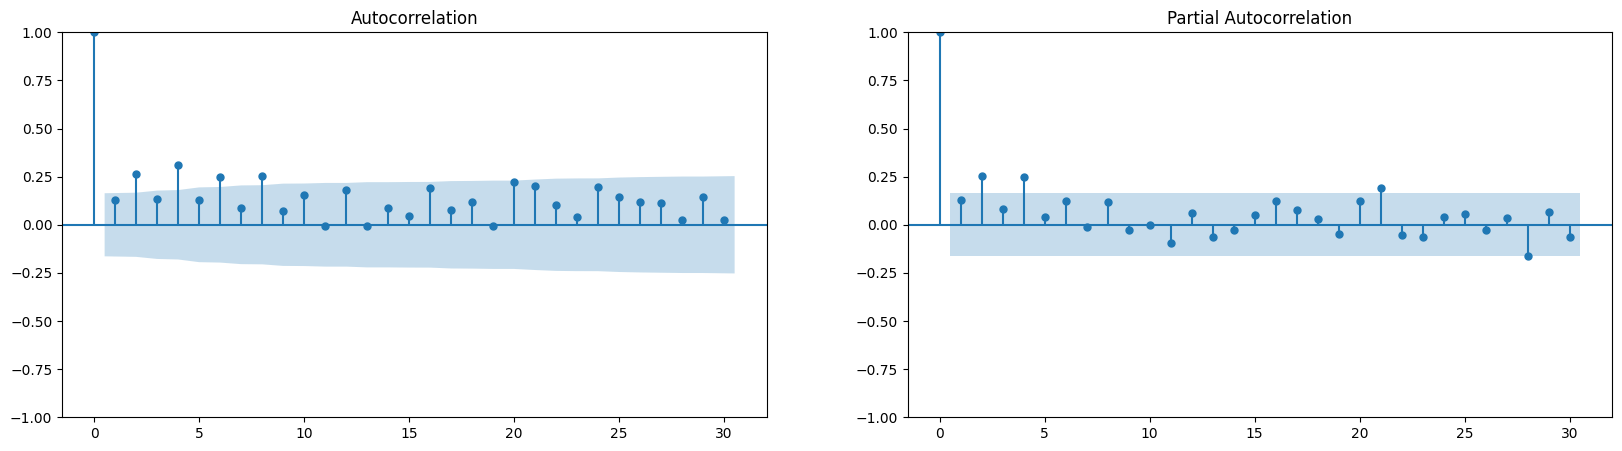

In [29]:
print(pd.Series(acf(ts,nlags=10), name = "Correlation Coeff"))
print(pd.Series(pacf(ts,nlags=10), name = "Partial Correlation Coeff"))


fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(ts, lags=30, ax=axes[0])
_ = plot_pacf(ts, lags=30, ax=axes[1])

In [30]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field If taken into account, the input will start with lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [31]:
dataset = series_to_supervised(pd.DataFrame(ts), ts, 4)
dataset

,Weekly_Sales(t-0),Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4),Weekly_Sales
Date,,,,,,
2010-03-05,2700.0,1350.0,1570.0,1535.0,2030.0,2700.0
2010-03-12,1760.0,2700.0,1350.0,1570.0,1535.0,1760.0
2010-03-19,2320.0,1760.0,2700.0,1350.0,1570.0,2320.0
2010-03-26,1620.0,2320.0,1760.0,2700.0,1350.0,1620.0
2010-04-02,1895.0,1620.0,2320.0,1760.0,2700.0,1895.0
...,...,...,...,...,...,...
2012-09-28,1035.0,1086.5,1141.5,850.0,765.0,1035.0
2012-10-05,1005.0,1035.0,1086.5,1141.5,850.0,1005.0
2012-10-12,1196.5,1005.0,1035.0,1086.5,1141.5,1196.5


In [32]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


In [33]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

In [35]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

In [36]:
regressor = LinearRegression()

In [37]:
regressor.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
y_pred_test_ln = regressor.predict(x_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

In [39]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.12826507500598916
Correlation test -0.09385443205786403
Mean Absolute Error: 1218.9282051415503
Mean Squared Error: 1496069.2012173075
Root Mean Squared Error: 1223.139076809055


In [40]:
def BP_model(X):
    """
    Multilayer neural network with back propagation .
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [41]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=1)

In [42]:
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1,  restore_best_weights=True)
history=estimator.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[es]) # Fitting model

C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.2314 - val_loss: 0.1201
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1241 - val_loss: 0.0325
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0311 - val_loss: 0.0337
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0292 - val_loss: 0.0184
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0224 - val_loss: 0.0170
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0223 - val_loss: 0.0189
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0209 - val_loss: 0.0197
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0233 - val_loss: 0.0175
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - val_loss: 0.0171
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0227 - val_loss: 0.0202
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0252 - val_loss: 0.0174
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 

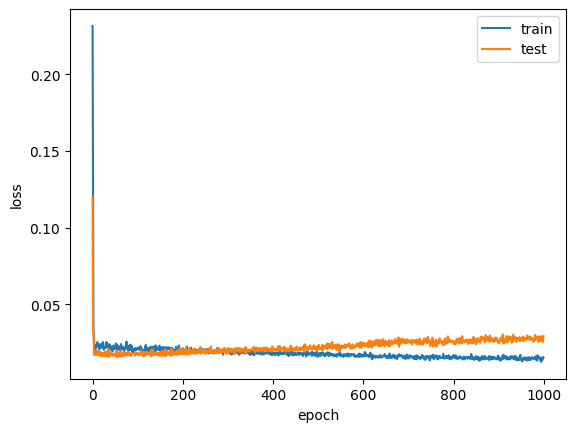

In [44]:
plt.figure()
plt.plot(history.history_['loss'], label='train')
plt.plot(history.history_['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [45]:
res_tr=estimator.predict(x_train)
res_ts=estimator.predict(x_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [46]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.6599860900654453
Correlation train -0.08387962786062671
Mean Absolute Error: 1292.0830118401432
Mean Squared Error: 1720702.7248024547
Root Mean Squared Error: 1311.7555888207432


In [47]:
train_x_LSTM = x_train.reshape((x_train.shape[0], 1, 4))
test_x_LSTM = x_test.reshape((x_test.shape[0], 1, 4))

In [48]:
batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(LSTM(100, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1])) #activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False, callbacks=[es])

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.1982 - val_loss: 0.0709
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0674 - val_loss: 0.0166
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0300 - val_loss: 0.0290
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0251 - val_loss: 0.0165
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0242 - val_loss: 0.0164
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0216 - val_loss: 0.0174
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0218 - val_loss: 0.0170
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0240 - val_loss: 0.0167
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0224 - val_loss: 0.0174
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0230 - val_loss: 0.0167
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0213 - val_loss: 0.0179
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━

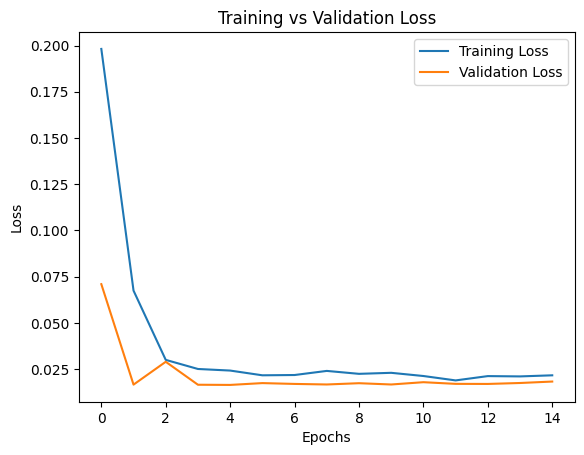

In [50]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [52]:
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))

Correlation train 0.3444440832345189
Correlation train 0.07991197884095967
Mean Absolute Error: 1121.828275802662
Mean Squared Error: 1266294.7892167105
Root Mean Squared Error: 1125.2976447219244


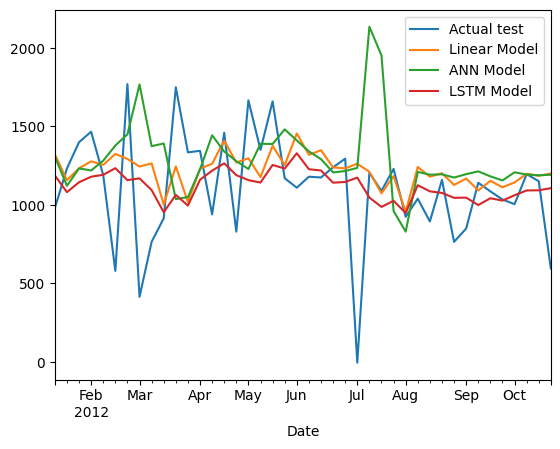

In [53]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

In [54]:
df_d = df_d.set_index('Date')
df_d

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,24,50,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
2010-02-12,24,50,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
2010-02-19,24,50,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
2010-02-26,24,50,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
2010-03-05,24,50,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,24,50,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
2012-10-05,24,50,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
2012-10-12,24,50,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819


In [55]:
df_d.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [56]:
df_d = df_d[['Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']]
df_d

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,
2010-02-05,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326
2010-02-12,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326
2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326
2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326
2010-03-05,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953
2012-10-05,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693
2012-10-12,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693


In [57]:
def my_headmap(corr):
    '''
    Input:
    corr: correlation matrix in DataFrame
    '''
    # Generate a mask for the upper triangle because it contains duplicate information
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmin=-1., vmax=1., annot=True, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})  

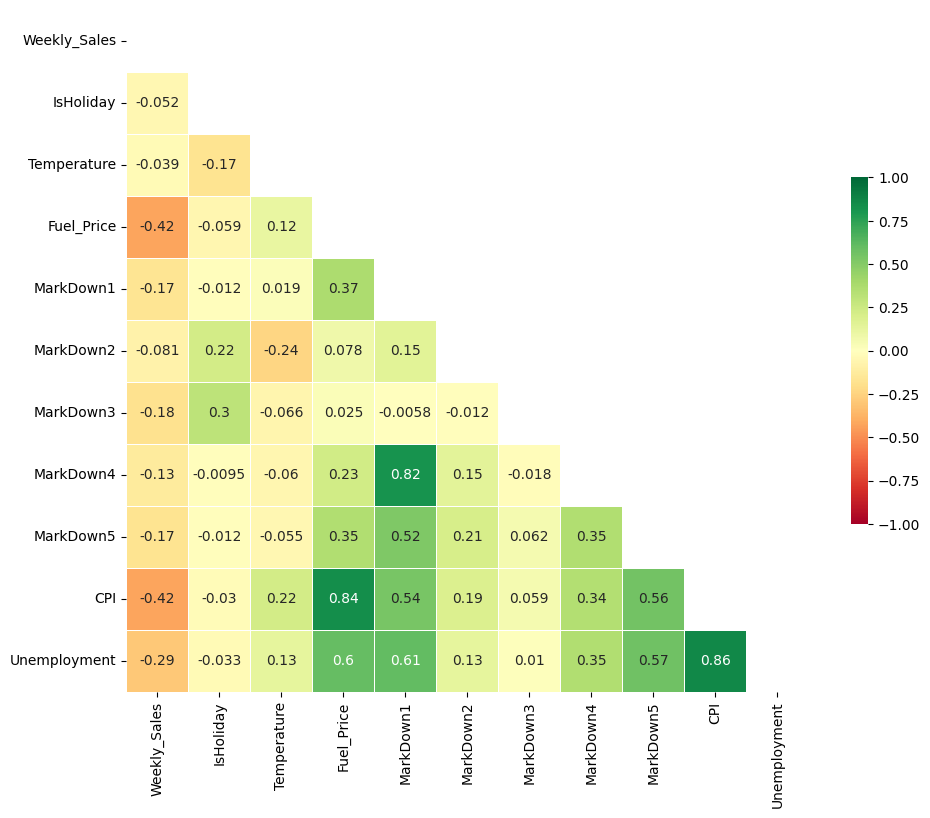

In [58]:
my_headmap(df_d.corr())

In [59]:
df_hp = df_d.join(dataset[dataset.columns[1:-1]])
df_hp = df_hp.dropna()
df_hp

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4)
Date,,,,,,,,,,,,,,,
2010-03-05,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,1350.0,1570.0,1535.0,2030.0
2010-03-12,1760.0,False,42.31,2.938,0.00,0.00,0.00,0.00,0.00,131.784000,8.326,2700.0,1350.0,1570.0,1535.0
2010-03-19,2320.0,False,46.09,2.960,0.00,0.00,0.00,0.00,0.00,131.824290,8.326,1760.0,2700.0,1350.0,1570.0
2010-03-26,1620.0,False,48.87,2.963,0.00,0.00,0.00,0.00,0.00,131.863129,8.326,2320.0,1760.0,2700.0,1350.0
2010-04-02,1895.0,False,45.22,2.957,0.00,0.00,0.00,0.00,0.00,131.901968,8.211,1620.0,2320.0,1760.0,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,1086.5,1141.5,850.0,765.0
2012-10-05,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,1035.0,1086.5,1141.5,850.0
2012-10-12,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,1005.0,1035.0,1086.5,1141.5


In [60]:
col = df_hp.columns
X, Y = df_hp[col[1:]], df_hp[col[0]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


In [61]:

scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

In [62]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

In [63]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

In [64]:
regressor = LinearRegression()

In [65]:
regressor.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [66]:
y_pred_test_ln = regressor.predict(x_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

In [67]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.26288332778616996
Correlation test -1.4471320314477514
Mean Absolute Error: 1334.5018593626783
Mean Squared Error: 1883506.558275048
Root Mean Squared Error: 1372.4090346085047


### Back propagation Neural Network


In [68]:
def BP_model(X):
    """
    Multilayer neural network with back propagation .
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [69]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=0)

In [70]:
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1, restore_best_weights=True)
history=estimator.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[es]) 

C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


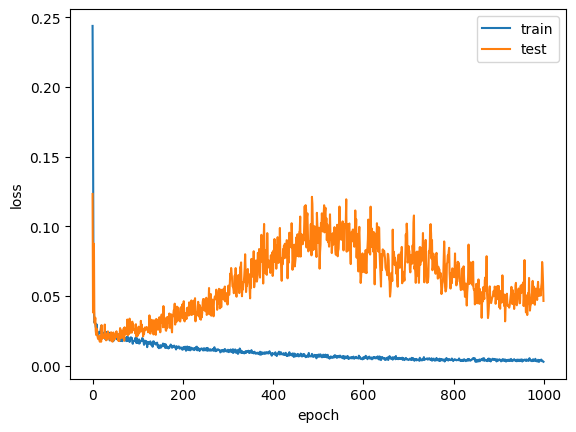

In [73]:
plt.figure()
plt.plot(history.history_['loss'], label='train')
plt.plot(history.history_['val_loss'], label='test')  # if you used validation data
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [74]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.6599860900654453
Correlation train -0.08387962786062671
Mean Absolute Error: 1292.0830118401432
Mean Squared Error: 1720702.7248024547
Root Mean Squared Error: 1311.7555888207432


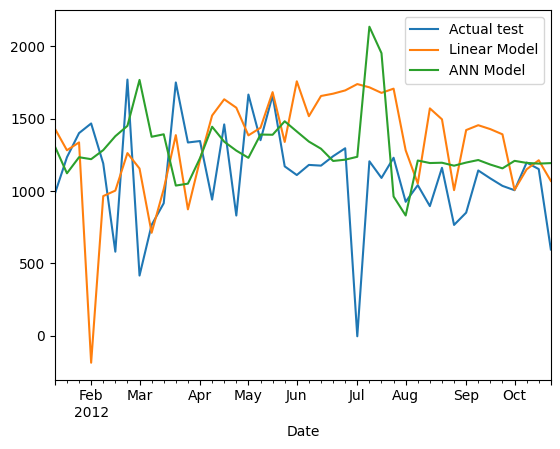

In [75]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN})
df_2.index = df_d.index[len(df_d)-len(res_test):]
df_2.plot()
plt.show()

## Sensitivity analysis

In [76]:
def my_sens(regressor, x, c, p):
    '''
    Input:
    x: DataFrame of input Linear Regression
    y: Series of output Linear Regression
    p: Percentage of price change
    Return:
    Sensitivity of target
    '''           
    X = x[-1:].copy()
    y_pred = regressor.predict(X)
    X[0][c] = X[0][c]*(1+p)
    y_pred_delta = regressor.predict(X)
    return ((y_pred_delta - y_pred) / y_pred)[0]

In [77]:
for i,c in enumerate(df_hp.columns[2:]):
    print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))

C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Temperature: -1.25%
Sensitivity of Week Sales on Fuel_Price:  4.41%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Temperature: -1.25%
Sensitivity of Week Sales on Fuel_Price:  4.41%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown1:  0.59%
Sensitivity of Week Sales on MarkDown2: -0.00%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Temperature: -1.25%
Sensitivity of Week Sales on Fuel_Price:  4.41%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown1:  0.59%
Sensitivity of Week Sales on MarkDown2: -0.00%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown3: -0.01%
Sensitivity of Week Sales on MarkDown4:  0.40%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Temperature: -1.25%
Sensitivity of Week Sales on Fuel_Price:  4.41%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown1:  0.59%
Sensitivity of Week Sales on MarkDown2: -0.00%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown3: -0.01%
Sensitivity of Week Sales on MarkDown4:  0.40%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown5:  1.31%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Temperature: -1.25%
Sensitivity of Week Sales on Fuel_Price:  4.41%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown1:  0.59%
Sensitivity of Week Sales on MarkDown2: -0.00%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown3: -0.01%
Sensitivity of Week Sales on MarkDown4:  0.40%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown5:  1.31%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on CPI: -0.07%
Sensitivity of Week Sales on Unemployment: -0.51%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Temperature: -1.25%
Sensitivity of Week Sales on Fuel_Price:  4.41%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown1:  0.59%
Sensitivity of Week Sales on MarkDown2: -0.00%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown3: -0.01%
Sensitivity of Week Sales on MarkDown4:  0.40%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown5:  1.31%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on CPI: -0.07%
Sensitivity of Week Sales on Unemployment: -0.51%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Weekly_Sales(t-1): -2.24%
Sensitivity of Week Sales on Weekly_Sales(t-2): -3.50%
Sensitivity of Week Sales on Weekly_Sales(t-3): -1.94%
Sensitivity of Week Sales on Weekly_Sales(t-4):  1.71%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Temperature: -1.25%
Sensitivity of Week Sales on Fuel_Price:  4.41%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown1:  0.59%
Sensitivity of Week Sales on MarkDown2: -0.00%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown3: -0.01%
Sensitivity of Week Sales on MarkDown4:  0.40%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on MarkDown5:  1.31%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on CPI: -0.07%
Sensitivity of Week Sales on Unemployment: -0.51%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


Sensitivity of Week Sales on Weekly_Sales(t-1): -2.24%
Sensitivity of Week Sales on Weekly_Sales(t-2): -3.50%
Sensitivity of Week Sales on Weekly_Sales(t-3): -1.94%
Sensitivity of Week Sales on Weekly_Sales(t-4):  1.71%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1048621125.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))


In [78]:
x_test2 = [list(x) for x in x_test if x[0]>=0.99]
x_test2 = np.array(x_test2)

In [79]:
for i,c in enumerate(df_hp.columns[2:]):
    print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))

C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Temperature: -2.65%
Sensitivity of Week Sales in Holiday on Fuel_Price: -1.26%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Temperature: -2.65%
Sensitivity of Week Sales in Holiday on Fuel_Price: -1.26%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown1: -1.39%
Sensitivity of Week Sales in Holiday on MarkDown2: -0.02%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Temperature: -2.65%
Sensitivity of Week Sales in Holiday on Fuel_Price: -1.26%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown1: -1.39%
Sensitivity of Week Sales in Holiday on MarkDown2: -0.02%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown3: -0.01%
Sensitivity of Week Sales in Holiday on MarkDown4: -0.14%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Temperature: -2.65%
Sensitivity of Week Sales in Holiday on Fuel_Price: -1.26%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown1: -1.39%
Sensitivity of Week Sales in Holiday on MarkDown2: -0.02%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown3: -0.01%
Sensitivity of Week Sales in Holiday on MarkDown4: -0.14%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown5: -0.59%
Sensitivity of Week Sales in Holiday on CPI:  2.98%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Temperature: -2.65%
Sensitivity of Week Sales in Holiday on Fuel_Price: -1.26%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown1: -1.39%
Sensitivity of Week Sales in Holiday on MarkDown2: -0.02%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown3: -0.01%
Sensitivity of Week Sales in Holiday on MarkDown4: -0.14%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown5: -0.59%
Sensitivity of Week Sales in Holiday on CPI:  2.98%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Unemployment:  5.60%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-1): -1.23%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Temperature: -2.65%
Sensitivity of Week Sales in Holiday on Fuel_Price: -1.26%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown1: -1.39%
Sensitivity of Week Sales in Holiday on MarkDown2: -0.02%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown3: -0.01%
Sensitivity of Week Sales in Holiday on MarkDown4: -0.14%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown5: -0.59%
Sensitivity of Week Sales in Holiday on CPI:  2.98%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Unemployment:  5.60%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-1): -1.23%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Weekly_Sales(t-2): -1.37%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-3): -0.86%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-4):  0.86%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Temperature: -2.65%
Sensitivity of Week Sales in Holiday on Fuel_Price: -1.26%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown1: -1.39%
Sensitivity of Week Sales in Holiday on MarkDown2: -0.02%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown3: -0.01%
Sensitivity of Week Sales in Holiday on MarkDown4: -0.14%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on MarkDown5: -0.59%
Sensitivity of Week Sales in Holiday on CPI:  2.98%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Unemployment:  5.60%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-1): -1.23%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


Sensitivity of Week Sales in Holiday on Weekly_Sales(t-2): -1.37%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-3): -0.86%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-4):  0.86%


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\1918106860.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))


## Recommendation for department


In [83]:
def sens_holiday(df, St, Dt):
    # DataSet creation
    df_d = df[(df['Store']==St) & (df['Dept']==Dt)] 
    
    # Week Sales Time Series creation
    ts = df_d[['Date', 'Weekly_Sales']]
    ts = ts.set_index('Date')
    ts = ts['Weekly_Sales'] 
    
    # Week Sales DataSet creation
    ts_dataset = series_to_supervised(pd.DataFrame(ts), ts, 4)
    df_d = df_d.set_index('Date')
    df_d = df_d[['Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']]
    df_hp = df_d.join(ts_dataset[ts_dataset.columns[1:-1]])
    df_hp = df_hp.dropna() 
    
    # Splitting on Input and Target
    col = df_hp.columns
    X, Y = df_hp[col[1:]], df_hp[col[0]] 
    
    # Normalization
    scaler_x = MinMaxScaler(feature_range=(0, 1))
    scaler_y = MinMaxScaler(feature_range=(0, 1))
    scaled_x = scaler_x.fit_transform(X)
    scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))     
    
    # Creation Train and Test DataSets
    x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)
    
    # Real scale target
    res_train = scaler_y.inverse_transform(y_train).flatten()
    res_test = scaler_y.inverse_transform(y_test).flatten() 
    
    # ANN Creation and fitting
    epochs = 1000
    batch_size = int(y_train.shape[0]*.1)
    estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=0) 
    es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1, restore_best_weights=True)
    history = estimator.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es])
    
    # Creation Holidays DataSet
    x_test2 = [list(x) for x in x_test if x[0]>=0.99]
    x_test2 = np.array(x_test2) 
    
    # Sensitivity calculation
    res = {}
    res['Store'] = [St]
    res['Department'] = [Dt]
    for i, c in enumerate(df_hp.columns[2:]):
        val = my_sens(estimator, x_test2, i+1, 0.1)
        if isinstance(val, np.ndarray):
            val = val.item()  # convert single-element array to float
        res[c] = [f"{val*100:.2f}%"]  # safe formatting
    res = pd.DataFrame(res)
    res = res.set_index(['Store', 'Department']) 
    return res


## Sensitivity of Department

In [84]:
sens_holiday(df, 1, 1)

C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4)
Store,Department,,,,,,,,,,,,,
1,1,-7.73%,-5.77%,-2.13%,-0.00%,-0.01%,-2.21%,0.21%,13.38%,-0.78%,1.31%,-0.85%,0.54%,-0.04%


## Sensitivity of 10 departments

In [85]:
depts = df[['Store', 'Dept']].value_counts()
depts = depts[depts == 143]
depts.name = 'rows'
depts

Store  Dept
45     97      143
1      1       143
45     74      143
       72      143
       71      143
              ... 
1      7       143
       6       143
       5       143
       4       143
       3       143
Name: rows, Length: 2660, dtype: int64

In [86]:
depts = depts.reset_index()
shuffled_dt = depts.reindex(np.random.permutation(depts.index))
shuffled_dt

,Store,Dept,rows
300,4,81,143
1684,23,4,143
2329,37,67,143
1353,40,91,143
639,9,41,143
...,...,...,...
1919,26,17,143
567,8,35,143
1743,23,95,143
777,11,20,143


In [88]:
sens_list = []  # store all DataFrames in a list
for v in shuffled_dt.values[:10]:
    print('Store:', v[0], 'Department:', v[1])
    sens_list.append(sens_holiday(df, v[0], v[1]))

# Combine all DataFrames at once
sens = pd.concat(sens_list)

Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 9 Department: 41


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 9 Department: 41


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 16


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 9 Department: 41


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 16


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 9 Department: 41


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 16


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 13 Department: 94


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 9 Department: 41


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 16


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 13 Department: 94


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 2 Department: 7


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 9 Department: 41


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 16


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 13 Department: 94


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 2 Department: 7


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 9 Department: 41


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 16


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 13 Department: 94


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 2 Department: 7


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 17 Department: 11


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 81


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 23 Department: 4


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 67


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 40 Department: 91


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 9 Department: 41


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 37 Department: 16


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 13 Department: 94


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 2 Department: 7


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 17 Department: 11


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Store: 4 Department: 93


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
def analyze_holiday_markdowns(df, store, dept):
    # Filter holiday weeks for store and dept
    df_h = df[(df['Store']==store) & (df['Dept']==dept) & (df['IsHoliday']==True)]
    if df_h.empty:
        return pd.DataFrame()
    
    # Markdown columns
    md_cols = [c for c in df_h.columns if 'MarkDown' in c]
    
    # Correlation with Weekly_Sales
    summary = pd.DataFrame({
        'Markdown': md_cols,
        'Corr_with_Sales': [df_h['Weekly_Sales'].corr(df_h[c]) for c in md_cols]
    }).sort_values(by='Corr_with_Sales', key=abs, ascending=False)
    
    summary['Store'] = store
    summary['Dept'] = dept
    return summary

def analyze_10_departments(df):
    # Pick 10 random store-dept pairs
    pairs = df[['Store','Dept']].drop_duplicates().sample(10, random_state=42)
    return pd.concat([analyze_holiday_markdowns(df,s,d) for s,d in pairs.values], ignore_index=True)

In [93]:
results = analyze_10_departments(df)
print(results)

     Markdown  Corr_with_Sales  Store  Dept
0   MarkDown1         0.655231      6    80
1   MarkDown4         0.623718      6    80
2   MarkDown5         0.607313      6    80
3   MarkDown2        -0.171876      6    80
4   MarkDown3        -0.046141      6    80
5   MarkDown3        -0.989180     36    22
6   MarkDown1        -0.843609     36    22
7   MarkDown4         0.752356     36    22
8   MarkDown2         0.749911     36    22
9   MarkDown5         0.066749     36    22
10  MarkDown5        -0.527586     18    54
11  MarkDown1        -0.431479     18    54
12  MarkDown4        -0.369914     18    54
13  MarkDown2        -0.318777     18    54
14  MarkDown3        -0.223360     18    54
15  MarkDown1              NaN     26    47
16  MarkDown2              NaN     26    47
17  MarkDown3              NaN     26    47
18  MarkDown4              NaN     26    47
19  MarkDown5              NaN     26    47
20  MarkDown2        -0.268216     29     3
21  MarkDown3        -0.095187  

C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [94]:
def plot_markdown_impact(df):
    """
    Analyze and plot markdown impact for 10 random store-department pairs.
    """
    results = analyze_10_departments(df)
    if results.empty:
        print("No data to plot")
        return
    
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=results,
        x='Markdown',
        y='Corr_with_Sales',
        hue='Dept',
        ci=None
    )
    plt.title("Markdown Impact on Weekly Sales (Holiday Weeks)")
    plt.ylabel("Correlation with Sales")
    plt.xlabel("Markdown")
    plt.legend(title="Department", bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\2907018717.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\ANUSHA\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_16688\2907018717.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


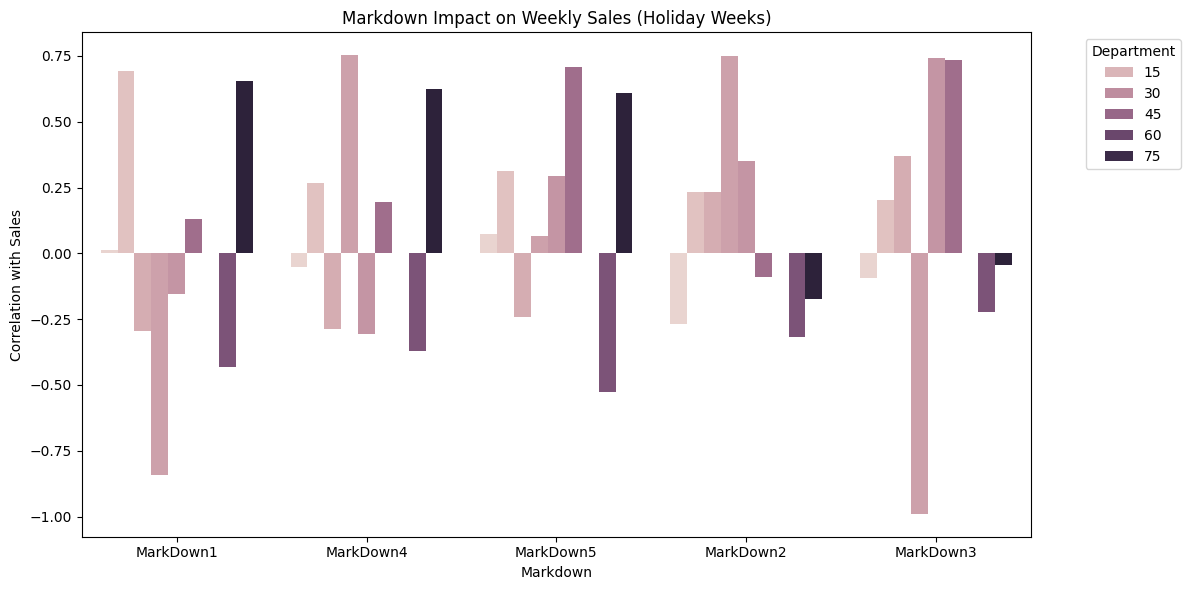

In [95]:
plot_markdown_impact(df)